# K-beauty 온라인 판매분석

In [1]:
# 라이브러리 불러오기
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import os
os.name

'nt'

In [3]:
# os별로 폰트 다르게 설정
if os.name == 'posix':
    sns.set(font="AppleGothic")
elif os.name == 'nt':
    sns.set(font="Malgun Gothic")

In [4]:
# 레티나 설정으로 글씨 선명하게 하기
%config inlineBackend.figure_format = 'retina'

# 데이터 로드

In [5]:
df_raw = pd.read_csv("data/국가_대륙_별_상품군별_온라인쇼핑_해외직접판매액_20210628173132.csv",
               encoding = 'cp949')
df_raw.shape

(450, 26)

In [7]:
df_raw.head(2)

,국가(대륙)별,상품군별,판매유형별,2014 1/4,2014 2/4,2014 3/4,2014 4/4,2015 1/4,2015 2/4,2015 3/4,...,2017 2/4,2017 3/4,2017 4/4,2018 1/4,2018 2/4,2018 3/4,2018 4/4,2019 1/4,2019 2/4,2019 3/4
0,합계,합계,계,148272,153641,163999,213216,269101,271784,268421,...,574551,749612,858240,833672,897205,921586,974060,1251122,1345723,1526135
1,합계,합계,면세점,-,-,-,-,-,-,-,...,441096,610630,677884,665613,725319,761836,770656,1070693,1157158,1336372


In [6]:
# 국가(대륙)별 데이터의 빈도수 세기
df_raw["국가(대륙)별"].value_counts()

일본            45
중동            45
중남미           45
대양주           45
기타            45
아세안(ASEAN)    45
유럽연합(EU)      45
미국            45
중국            45
합계            45
Name: 국가(대륙)별, dtype: int64

In [8]:
# 미국 데이터만 따로보기
df_raw[df_raw["국가(대륙)별"] == "미국"].head()

,국가(대륙)별,상품군별,판매유형별,2014 1/4,2014 2/4,2014 3/4,2014 4/4,2015 1/4,2015 2/4,2015 3/4,...,2017 2/4,2017 3/4,2017 4/4,2018 1/4,2018 2/4,2018 3/4,2018 4/4,2019 1/4,2019 2/4,2019 3/4
45,미국,합계,계,25773,22573,21288,26729,39945,26654,28647,...,40976,41927,53209,42679,40207,37631,48978,40985,44973,55512
46,미국,합계,면세점,-,-,-,-,-,-,-,...,9183,9469,12177,5184,3603,2317,2079,2657,2951,1818
47,미국,합계,면세점 이외,-,-,-,-,-,-,-,...,31793,32458,41032,37495,36604,35314,46899,38328,42022,53694
48,미국,컴퓨터 및 주변기기,계,2216,1666,1776,1675,1469,1393,2166,...,946,791,854,2033,1553,1784,1774,1298,1408,1653
49,미국,컴퓨터 및 주변기기,면세점,-,-,-,-,-,-,-,...,0,0,0,0,0,0,1,0,0,0


# 분석, 시각화를 위한 tidy data 만들기
* df.melt( ) 사용

In [9]:
df_raw.columns

Index(['국가(대륙)별', '상품군별', '판매유형별', '2014 1/4', '2014 2/4', '2014 3/4',
       '2014 4/4', '2015 1/4', '2015 2/4', '2015 3/4', '2015 4/4', '2016 1/4',
       '2016 2/4', '2016 3/4', '2016 4/4', '2017 1/4', '2017 2/4', '2017 3/4',
       '2017 4/4', '2018 1/4', '2018 2/4', '2018 3/4', '2018 4/4', '2019 1/4',
       '2019 2/4', '2019 3/4'],
      dtype='object')

In [10]:
df = df_raw.melt(id_vars = ["국가(대륙)별", "상품군별", "판매유형별"],
               var_name = "기간", value_name = "million")
df.shape

(10350, 5)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10350 entries, 0 to 10349
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   국가(대륙)별  10350 non-null  object
 1   상품군별     10350 non-null  object
 2   판매유형별    10350 non-null  object
 3   기간       10350 non-null  object
 4   million  10350 non-null  object
dtypes: object(5)
memory usage: 404.4+ KB


# 데이터 전처리

In [12]:
# 람다 함수 사용하여 기간에서 연도 분리
# 연도라는 새 변수 생성
df["연도"] = df["기간"].map(lambda x : int(x.split()[0]))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10350 entries, 0 to 10349
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   국가(대륙)별  10350 non-null  object
 1   상품군별     10350 non-null  object
 2   판매유형별    10350 non-null  object
 3   기간       10350 non-null  object
 4   million  10350 non-null  object
 5   연도       10350 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 485.3+ KB


In [13]:
# 마찬가지로 '분기' 변수 생성
df["분기"] = df["기간"].apply(lambda x : x.split()[1].split('/')[0])
df["분기"] = df["분기"].astype(int)
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,million,연도,분기
0,합계,합계,계,2014 1/4,148272,2014,1
1,합계,합계,면세점,2014 1/4,-,2014,1
2,합계,합계,면세점 이외,2014 1/4,-,2014,1
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915,2014,1
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,-,2014,1


In [17]:
# 금액을 수치데이터로 표현하기 위해 데이터 타입 변경
df["million"] = df["million"].replace("-", pd.np.nan).astype(float)
df["million"]

<ipython-input-17-d3ead398f184>:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  df["million"] = df["million"].replace("-", pd.np.nan).astype(float)


48       2216.0
49          NaN
50          NaN
51       2875.0
52          NaN
          ...  
10345       0.0
10346     308.0
10347     469.0
10348       0.0
10349     469.0
Name: million, Length: 8694, dtype: float64

In [14]:
# 필요없는 데이터 제거
# 합계 데이터를 전체 데이터에서 제거한다
df = df[(df["국가(대륙)별"] !='합계') &
        (df["상품군별"] != '합계')].copy()
df

,국가(대륙)별,상품군별,판매유형별,기간,million,연도,분기
48,미국,컴퓨터 및 주변기기,계,2014 1/4,2216,2014,1
49,미국,컴퓨터 및 주변기기,면세점,2014 1/4,-,2014,1
50,미국,컴퓨터 및 주변기기,면세점 이외,2014 1/4,-,2014,1
51,미국,가전·전자·통신기기,계,2014 1/4,2875,2014,1
52,미국,가전·전자·통신기기,면세점,2014 1/4,-,2014,1
...,...,...,...,...,...,...,...
10345,기타,생활용품 및 자동차용품,면세점,2019 3/4,0,2019,3
10346,기타,생활용품 및 자동차용품,면세점 이외,2019 3/4,308,2019,3
10347,기타,기 타,계,2019 3/4,469,2019,3
10348,기타,기 타,면세점,2019 3/4,0,2019,3


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8694 entries, 48 to 10349
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   국가(대륙)별  8694 non-null   object 
 1   상품군별     8694 non-null   object 
 2   판매유형별    8694 non-null   object 
 3   기간       8694 non-null   object 
 4   million  5670 non-null   float64
 5   연도       8694 non-null   int64  
 6   분기       8694 non-null   int32  
dtypes: float64(1), int32(1), int64(1), object(4)
memory usage: 509.4+ KB


In [19]:
df.isnull().sum()

국가(대륙)별       0
상품군별          0
판매유형별         0
기간            0
million    3024
연도            0
분기            0
dtype: int64

# K-Beauty 시각화

전체 상품군 판매액
* 결측치가 있으면 시각화가 잘 나타나지 않을수도 있으므로 NAN 행 데이터 제거

In [23]:
# '판매유형별'이 '계'인 데이터 가져오기
df_total = df[df["판매유형별"] == "계"].copy()
df_total.head()

,국가(대륙)별,상품군별,판매유형별,기간,million,연도,분기
48,미국,컴퓨터 및 주변기기,계,2014 1/4,2216.0,2014,1
51,미국,가전·전자·통신기기,계,2014 1/4,2875.0,2014,1
54,미국,소프트웨어,계,2014 1/4,47.0,2014,1
57,미국,서 적,계,2014 1/4,962.0,2014,1
60,미국,사무·문구,계,2014 1/4,25.0,2014,1


<AxesSubplot:xlabel='연도', ylabel='million'>

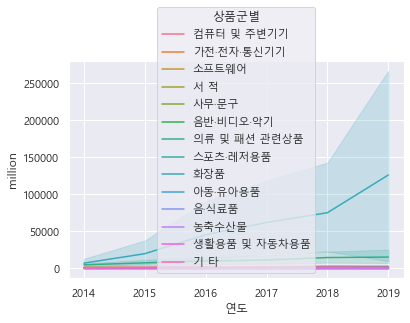

In [25]:
sns.lineplot(data=df_total, x="연도", y="million", hue="상품군별")

* legend를 그래프의 밖에 그리기 : https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot

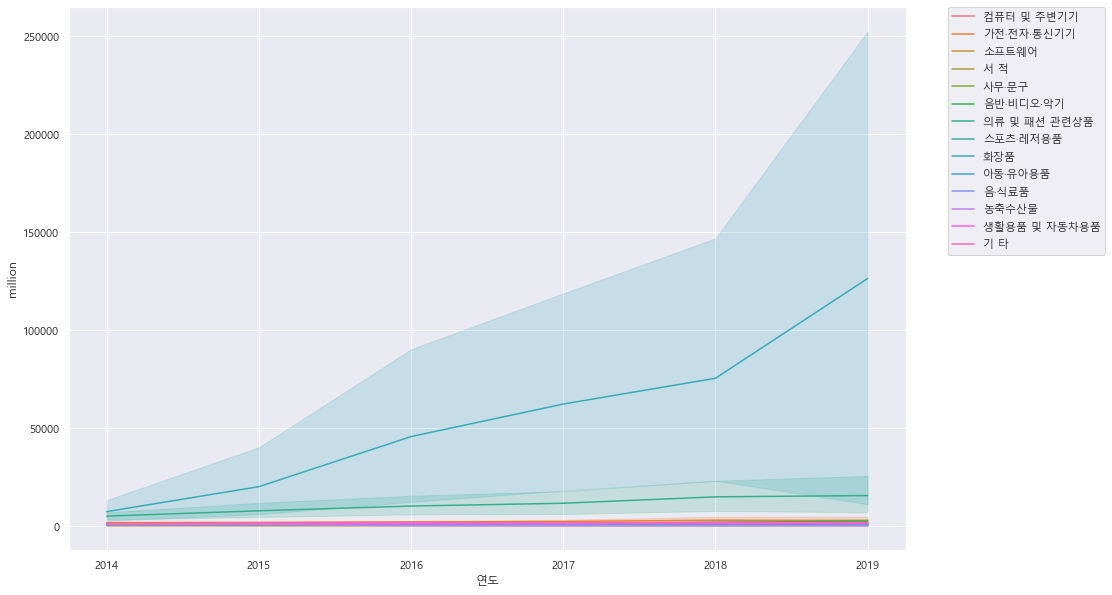

In [26]:
plt.figure(figsize=(15, 10))
sns.lineplot(data=df_total, x="연도", y="million", hue="상품군별")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

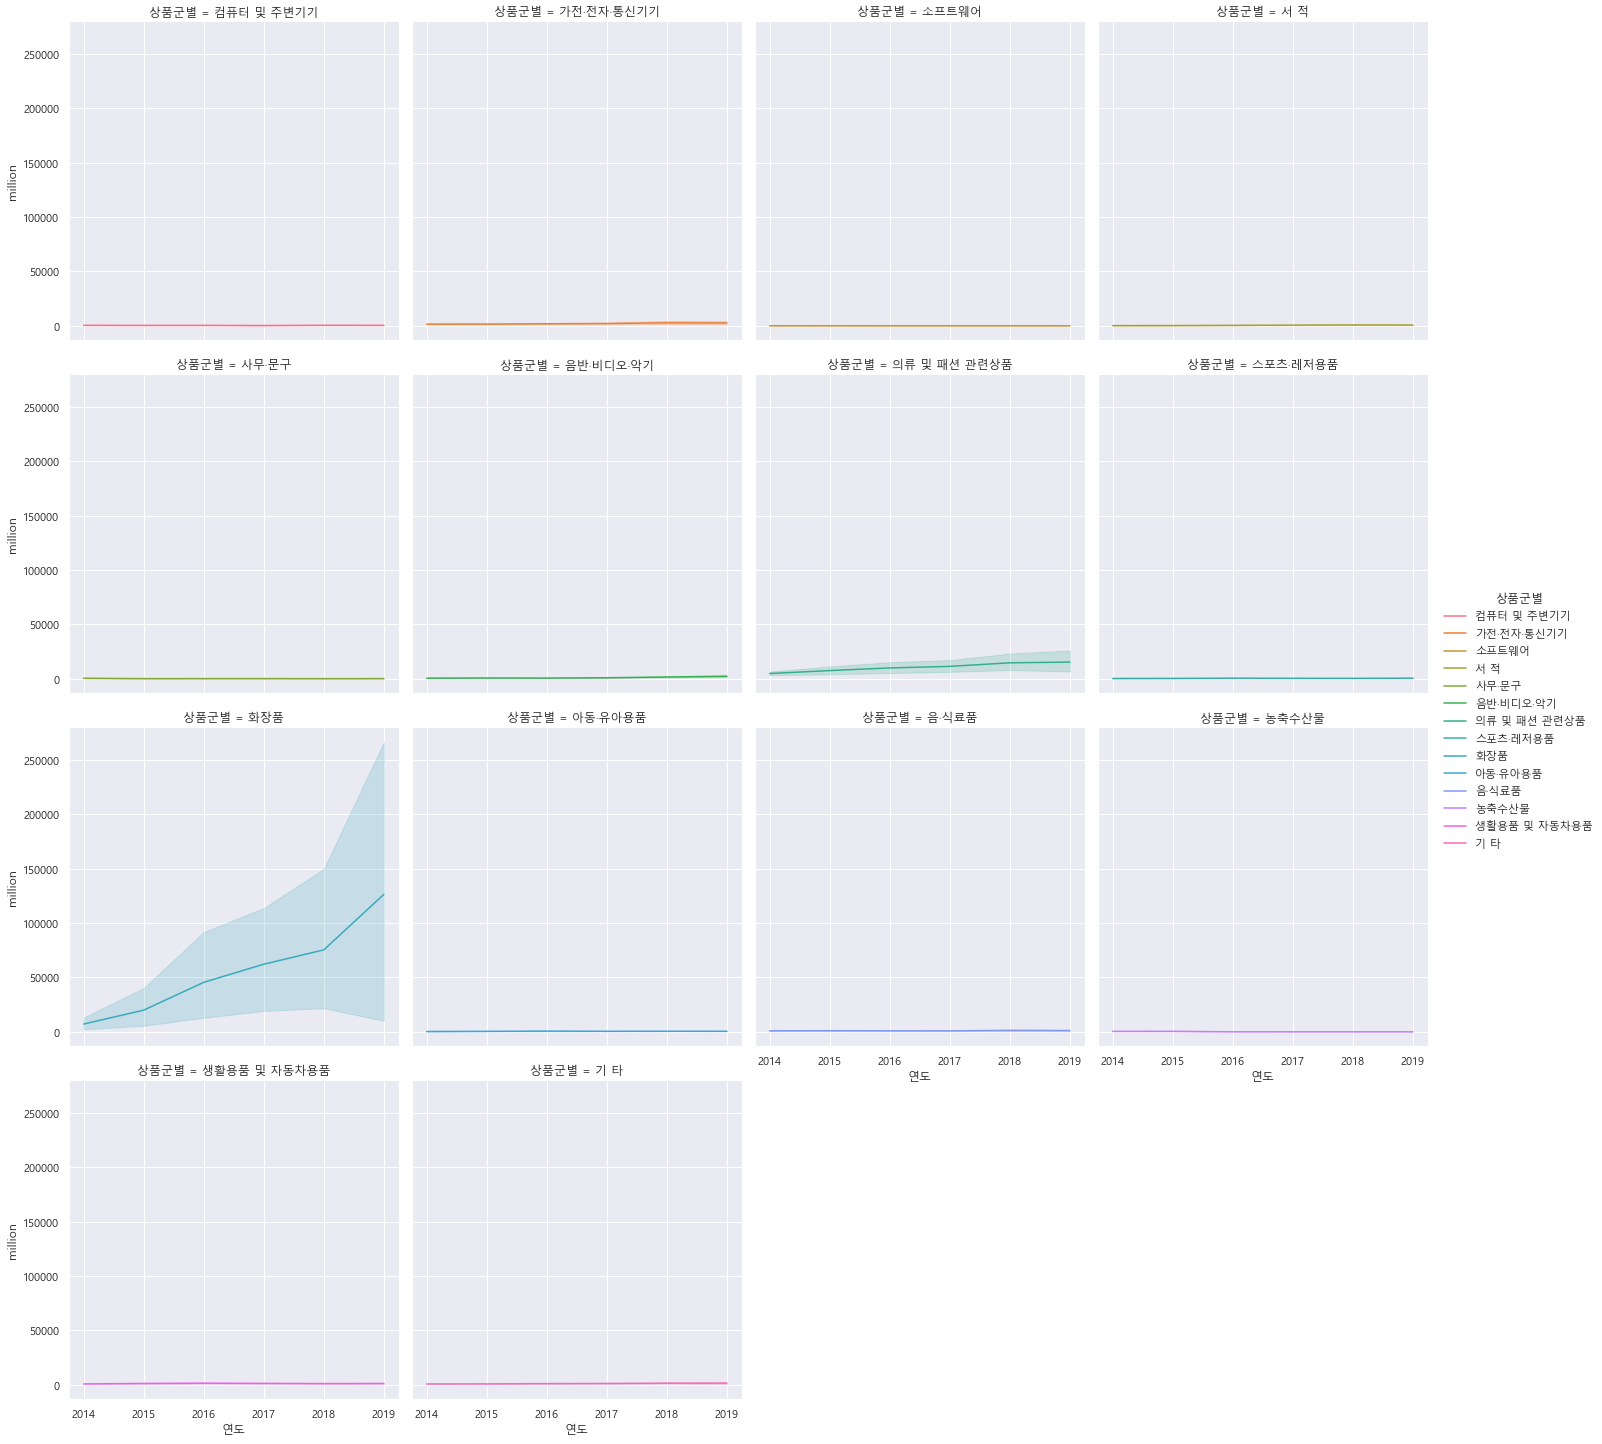

In [27]:
# lineplot의 서브플롯을 그리기 위해 relplot 사용
sns.relplot(data=df_total, x="연도", y="million", hue = "상품군별",
           kind="line", col = "상품군별", col_wrap=4)

In [28]:
# 화장품의 상승세가 높아 다른 값을 확인하기 힘드므로, 화장품을 제외하고 다시 살펴보기 위해 데이터를 만든다
# ~ isin()
df_sub = df_total[~df_total["상품군별"].isin(["화장품"])].copy()
df_sub

,국가(대륙)별,상품군별,판매유형별,기간,million,연도,분기
48,미국,컴퓨터 및 주변기기,계,2014 1/4,2216.0,2014,1
51,미국,가전·전자·통신기기,계,2014 1/4,2875.0,2014,1
54,미국,소프트웨어,계,2014 1/4,47.0,2014,1
57,미국,서 적,계,2014 1/4,962.0,2014,1
60,미국,사무·문구,계,2014 1/4,25.0,2014,1
...,...,...,...,...,...,...,...
10335,기타,아동·유아용품,계,2019 3/4,95.0,2019,3
10338,기타,음·식료품,계,2019 3/4,184.0,2019,3
10341,기타,농축수산물,계,2019 3/4,0.0,2019,3
10344,기타,생활용품 및 자동차용품,계,2019 3/4,308.0,2019,3


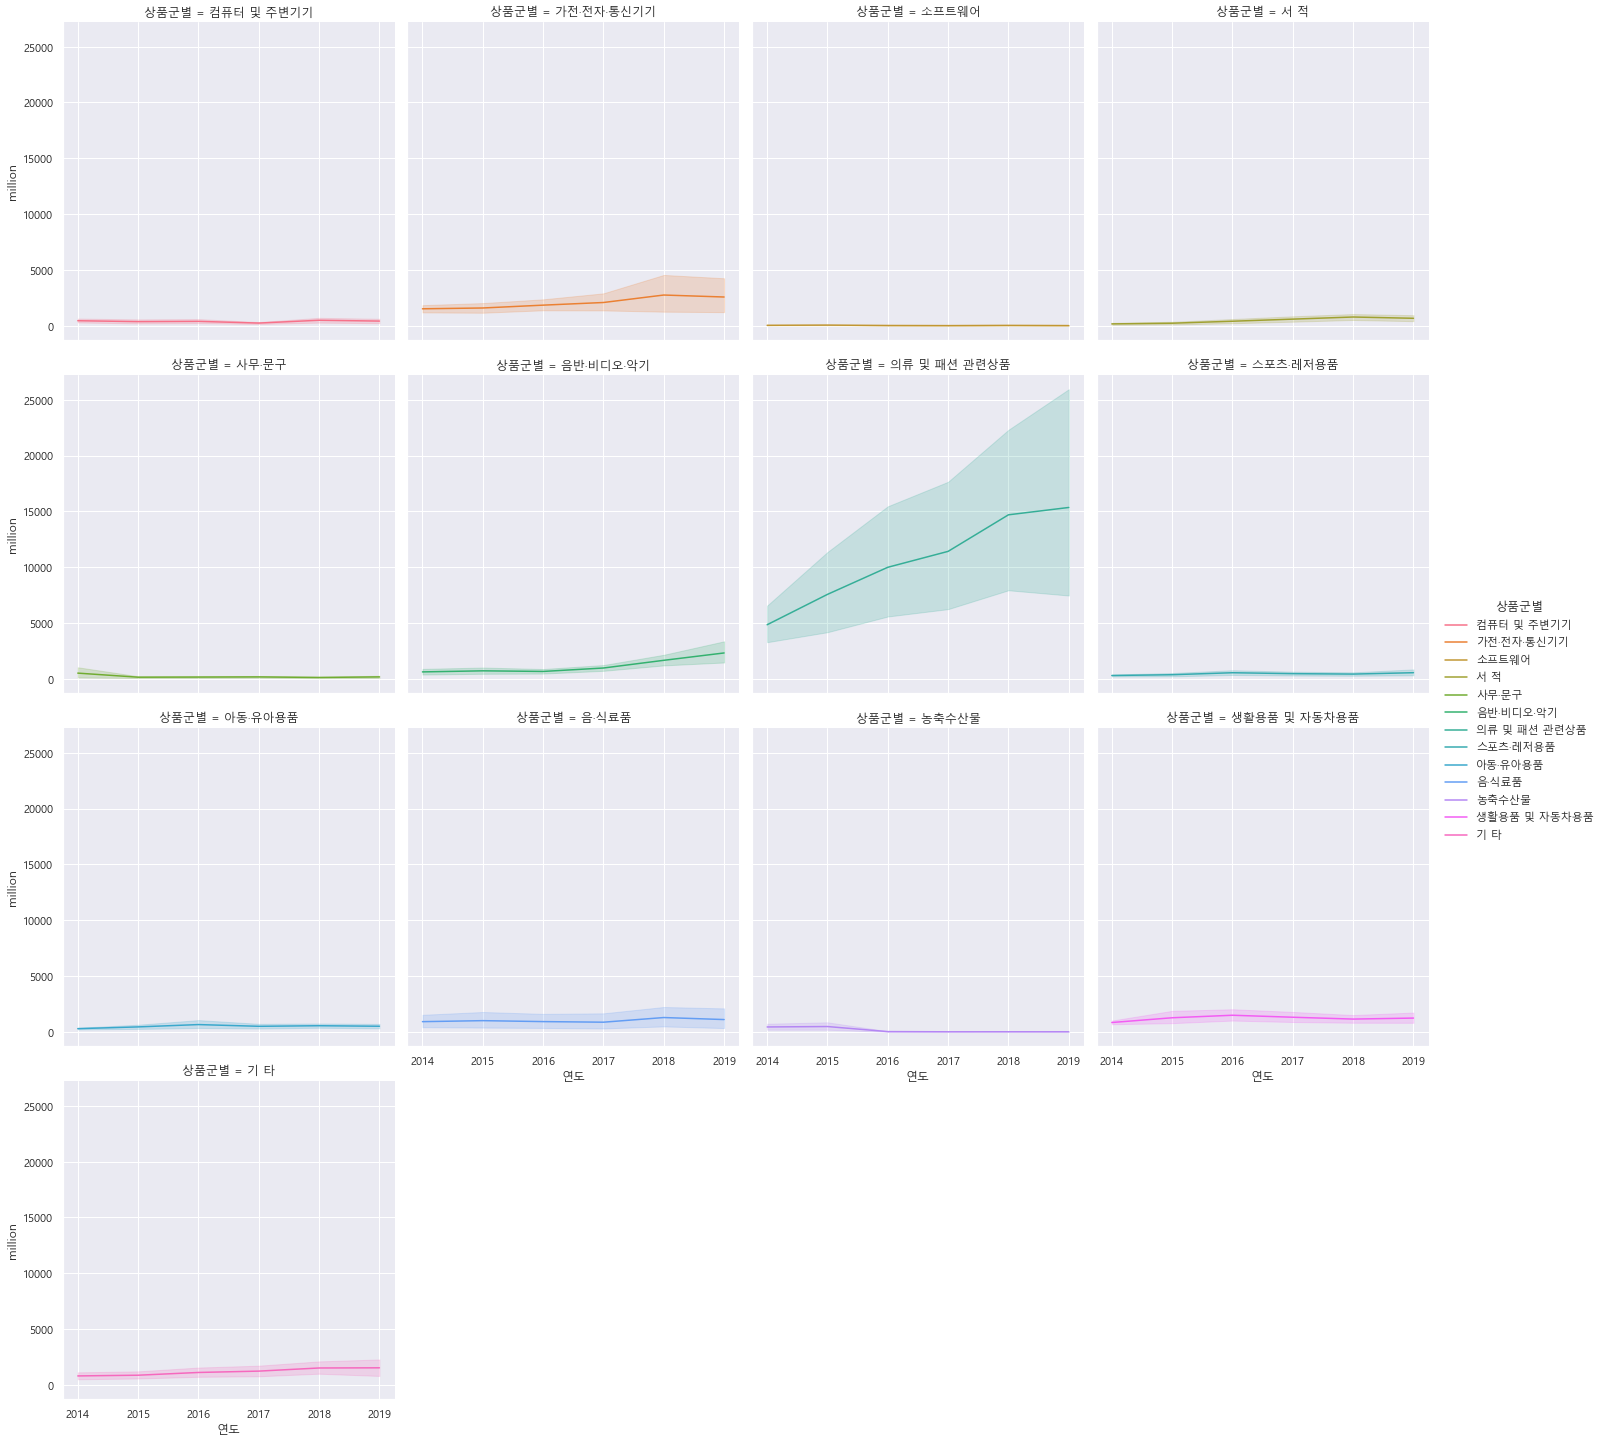

In [29]:
# 아까와 똑같이 relplot으로 시각화 해 결과보기
sns.relplot(data=df_sub, x="연도", y="million", hue="상품군별",
           kind="line", col="상품군별", col_wrap = 4)

In [30]:
# 의류관련 상품들도 상승세를 보이므로 다른 상품군들을 더 자세히 살펴보기 위해 제외
df_sub2 = df[~df["상품군별"].isin(["화장품", "의류 및 패션 관련상품"])]
df_sub2.head()

,국가(대륙)별,상품군별,판매유형별,기간,million,연도,분기
48,미국,컴퓨터 및 주변기기,계,2014 1/4,2216.0,2014,1
49,미국,컴퓨터 및 주변기기,면세점,2014 1/4,NaN,2014,1
50,미국,컴퓨터 및 주변기기,면세점 이외,2014 1/4,NaN,2014,1
51,미국,가전·전자·통신기기,계,2014 1/4,2875.0,2014,1
52,미국,가전·전자·통신기기,면세점,2014 1/4,NaN,2014,1


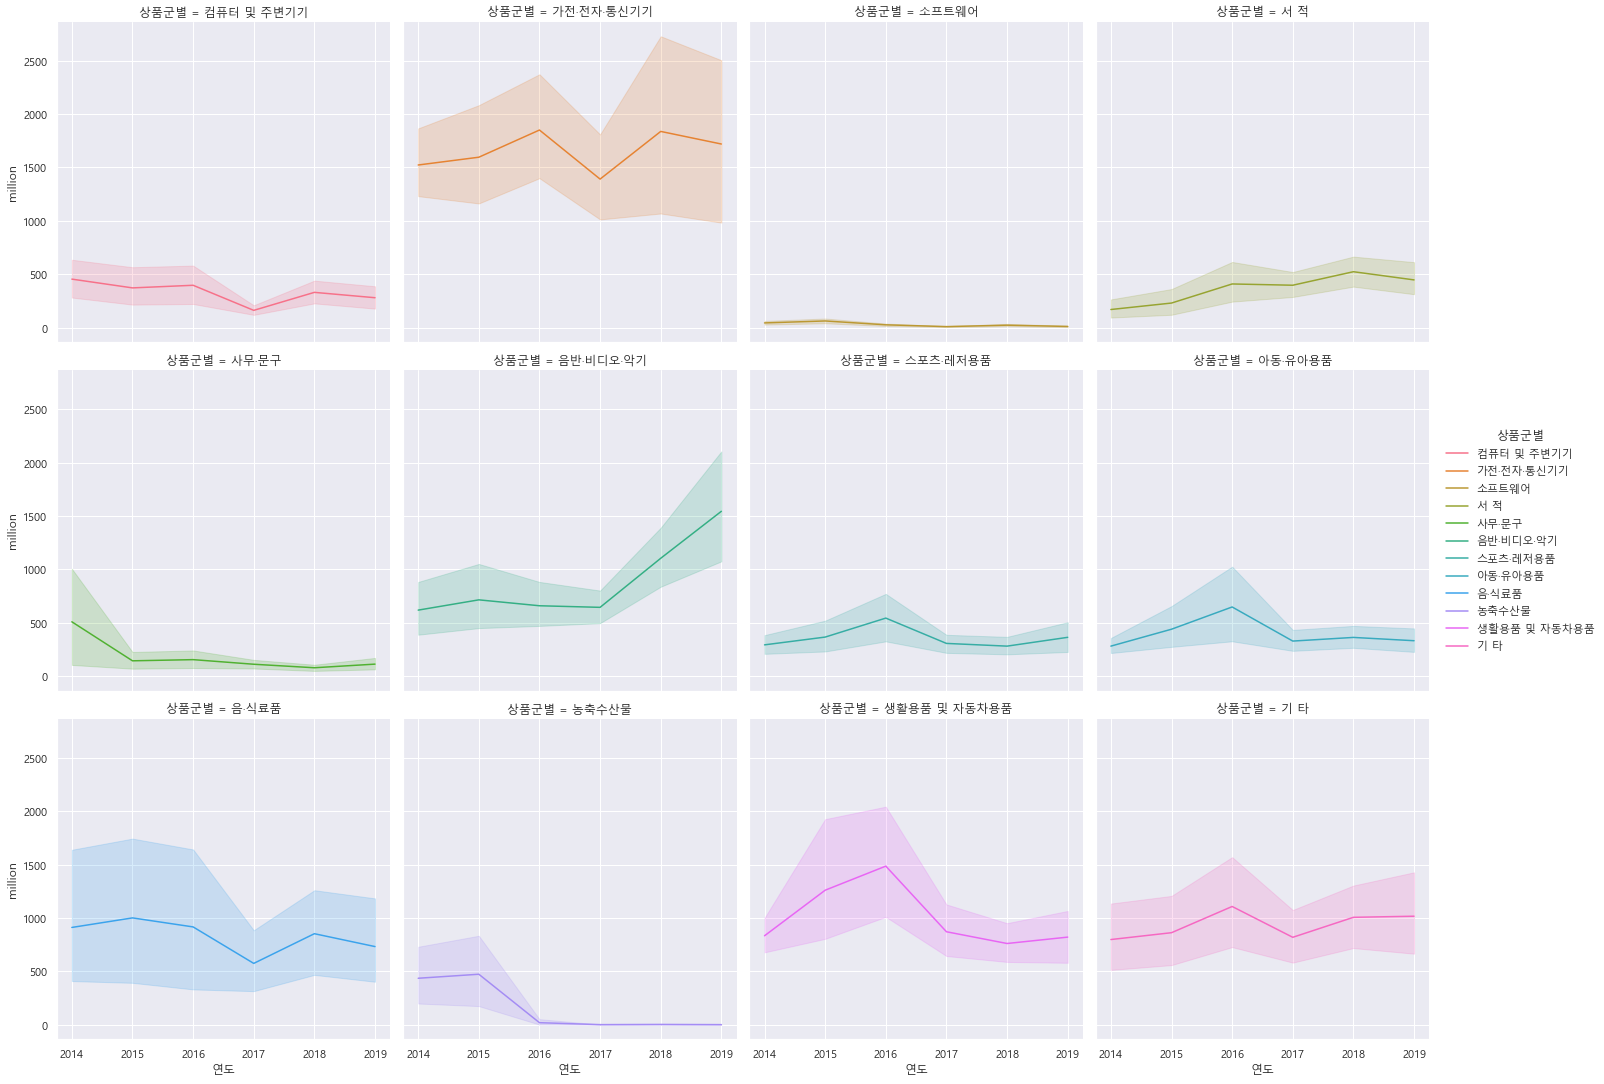

In [31]:
# relplot으로 시각화
sns.relplot(data=df_sub2, x="연도", y="million", hue="상품군별",
           kind="line", col="상품군별", col_wrap = 4)

화장품의 온라인쇼핑 해외직접판매액

<AxesSubplot:xlabel='연도', ylabel='million'>

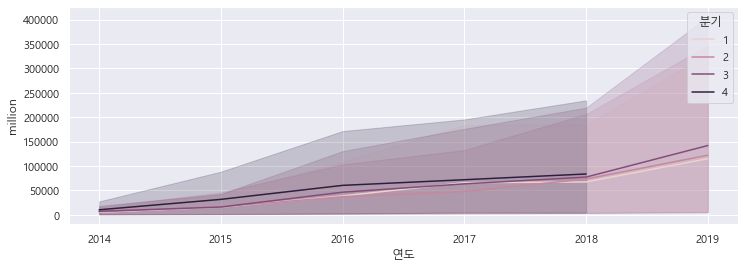

In [32]:
# 화장품 판매액을 알아보고, 분기별 화장품 판매액의 변화를 시각화
df_cosmatic = df_total[df_total["상품군별"] == "화장품"].copy()

plt.figure(figsize=(12, 4))
sns.lineplot(data=df_cosmatic, x="연도", y="million", hue="분기")

<AxesSubplot:xlabel='기간', ylabel='million'>

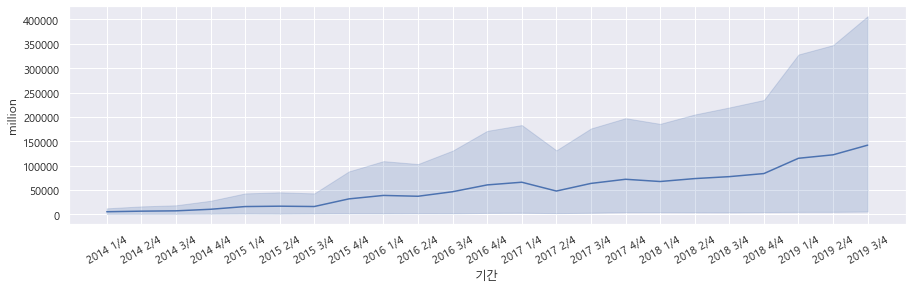

In [33]:
# 기간별 화장품 판매액
plt.figure(figsize=(15, 4))
plt.xticks(rotation = 30) # 글씨 기울이기
sns.lineplot(data=df_cosmatic, x="기간", y="million")

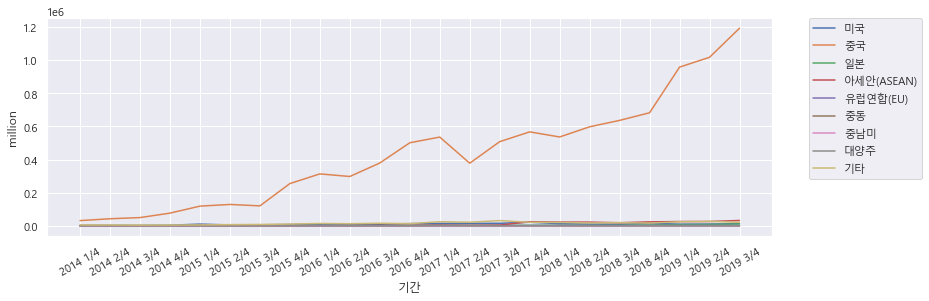

In [34]:
# 기간, 국가별 화장품 판매액
plt.figure(figsize=(13, 4))
plt.xticks(rotation = 30) # 글씨 회전
sns.lineplot(data=df_cosmatic, x="기간", y="million", hue = "국가(대륙)별",
            ci=None)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) # 범례 위치 지정

In [35]:
# 값이 가장 높은 중국의 값을 빼고 다시 시각화 해보기
df_cosmatic_sub = df_cosmatic[df_cosmatic["국가(대륙)별"] != "중국"]

<AxesSubplot:xlabel='기간', ylabel='million'>

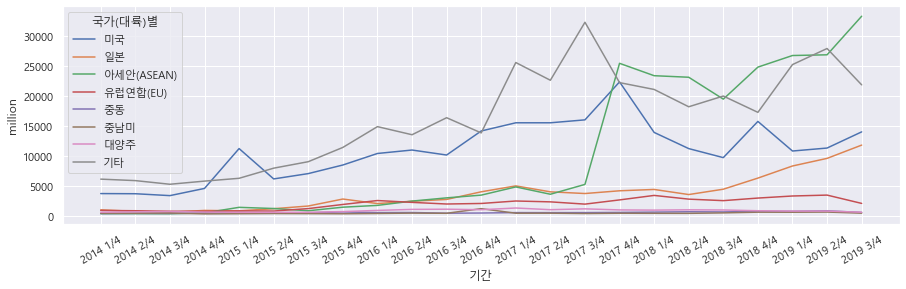

In [36]:
plt.figure(figsize=(15, 4))
plt.xticks(rotation = 30)
sns.lineplot(data=df_cosmatic_sub, x="기간", y="million", hue= "국가(대륙)별",
            ci=None)

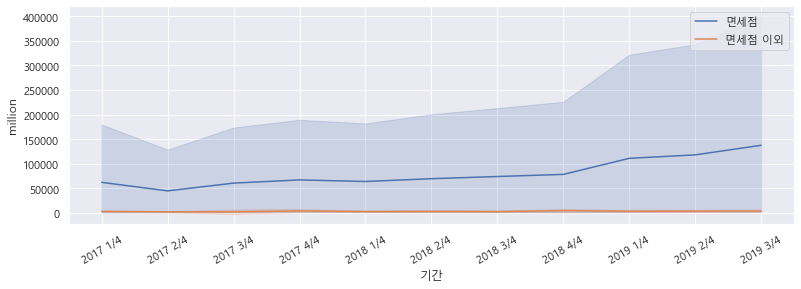

In [42]:
# 기간, 판매유형별 화장품 판매액
df_sub = df[(df["판매유형별"] != "계") & (df["상품군별"] == "화장품")]
plt.figure(figsize=(13, 4))
plt.xticks(rotation = 30) # 글씨 회전
sns.lineplot(data=df_sub, x="기간", y="million", hue = "판매유형별")
plt.legend(loc="best") # 범례 지정

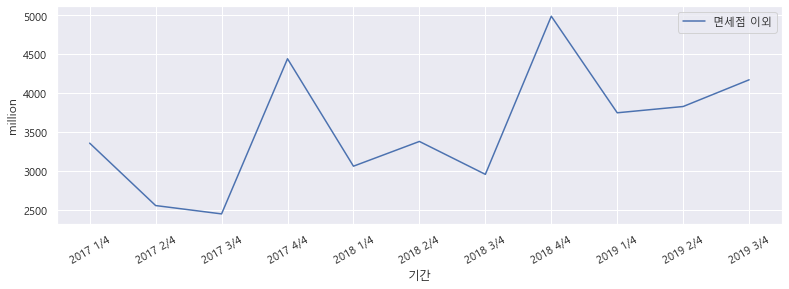

In [45]:
# 판매유형 중 '면세점 이외'에서의 화장품 판매액 시각화
df_sub = df[(df["판매유형별"] != "계") & (df["상품군별"] == "화장품")
           & (df["판매유형별"] != "면세점")]
plt.figure(figsize=(13, 4))
plt.xticks(rotation = 30) # 글씨 회전
sns.lineplot(data=df_sub, x="기간", y="million", hue = "판매유형별",
            ci=None)
plt.legend(loc="best")

의류 및 패션 관련 상품 판매액 시각화

In [54]:
# 의류 데이터만 따로 변수에 넣기
df_fashion = df[df["상품군별"] == "의류 및 패션 관련상품"].copy()
df_fashion.head()


,국가(대륙)별,상품군별,판매유형별,기간,million,연도,분기
66,미국,의류 및 패션 관련상품,계,2014 1/4,9810.0,2014,1
67,미국,의류 및 패션 관련상품,면세점,2014 1/4,NaN,2014,1
68,미국,의류 및 패션 관련상품,면세점 이외,2014 1/4,NaN,2014,1
111,중국,의류 및 패션 관련상품,계,2014 1/4,12206.0,2014,1
112,중국,의류 및 패션 관련상품,면세점,2014 1/4,NaN,2014,1


In [59]:
# 동시에 판매유형별이 '계'인 데이터를 df_fashion에 넣기
df_fashion = df[(df["상품군별"] == "의류 및 패션 관련상품") &
               (df["판매유형별"] == "계")].copy()
df_fashion.head()

,국가(대륙)별,상품군별,판매유형별,기간,million,연도,분기
66,미국,의류 및 패션 관련상품,계,2014 1/4,9810.0,2014,1
111,중국,의류 및 패션 관련상품,계,2014 1/4,12206.0,2014,1
156,일본,의류 및 패션 관련상품,계,2014 1/4,13534.0,2014,1
201,아세안(ASEAN),의류 및 패션 관련상품,계,2014 1/4,3473.0,2014,1
246,유럽연합(EU),의류 및 패션 관련상품,계,2014 1/4,1364.0,2014,1


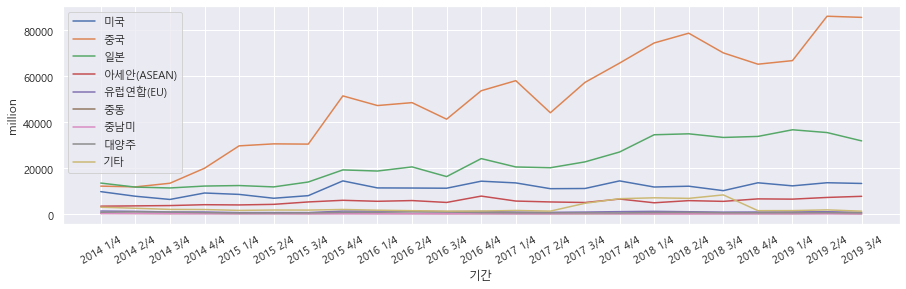

In [60]:
# 기간별, 국가별 금액 데이터 시각화
plt.figure(figsize = (15, 4))
plt.xticks(rotation = 30)
sns.lineplot(data=df_fashion, x="기간", y="million", hue = "국가(대륙)별",
            ci=None)
plt.legend(loc = "best")

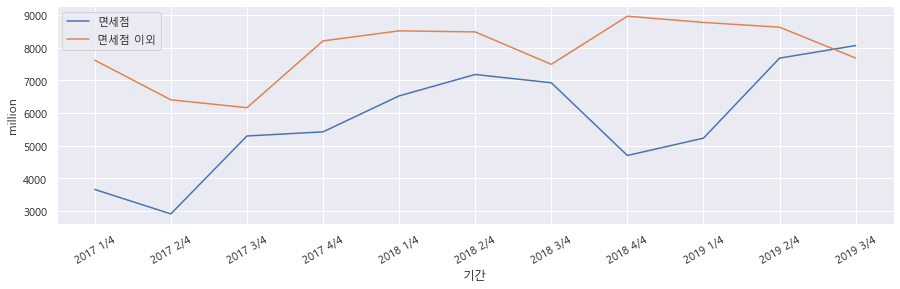

In [62]:
# '계'가 아닌 '판매유형별' 데이터도 시각화
# 면세점, 면세점 이외의 데이터를 볼 수 있다 (결측치 때문에 2017년 데이터부터 있음)
df_fashion2 = df[(df["상품군별"] == "의류 및 패션 관련상품") &
               (df["판매유형별"] != "계")].copy()

plt.figure(figsize = (15, 4))
plt.xticks(rotation = 30)
sns.lineplot(data=df_fashion2, x="기간", y="million", hue = "판매유형별",
            ci=None)
plt.legend(loc = "best")

데이터 집계하기

In [66]:
# 피벗테이블로 국가별 연도별 합계 금액을 표 형태로 구하기
result = df_fashion.pivot_table(index="국가(대륙)별", columns = "연도",
                              values="million", aggfunc="sum")
result

연도,2014,2015,2016,2017,2018,2019
국가(대륙)별,,,,,,
기타,9683.0,7248.0,5918.0,14387.0,23901.0,4701.0
대양주,3392.0,2349.0,3401.0,2266.0,2725.0,1838.0
미국,33223.0,38066.0,48451.0,50353.0,47875.0,39375.0
아세안(ASEAN),14936.0,19639.0,24478.0,22671.0,23068.0,21583.0
유럽연합(EU),4485.0,3374.0,4899.0,3736.0,4114.0,2832.0
일본,48960.0,57594.0,79905.0,90584.0,136800.0,104165.0
중국,57531.0,142339.0,190932.0,225407.0,288848.0,238721.0
중남미,975.0,616.0,649.0,762.0,576.0,420.0
중동,1172.0,1018.0,968.0,772.0,879.0,700.0


연산 결과 시각적으로 보기

<AxesSubplot:xlabel='연도', ylabel='국가(대륙)별'>

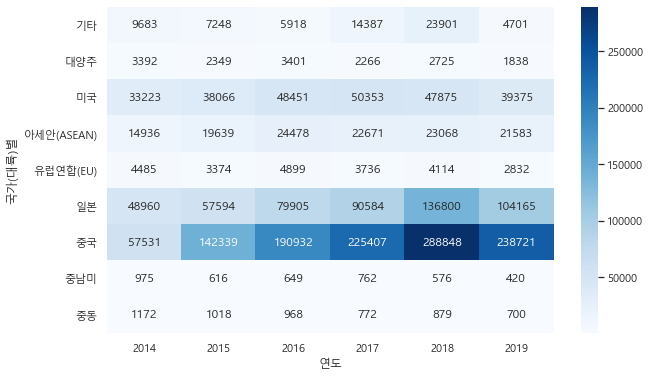

In [68]:
# 피벗테이블 결과를 히트맵으로 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(result, cmap='Blues', annot = True, fmt='.0f')

전체 상품군별로 온라인쇼핑 해외직접판매액은 증가했을까?

<AxesSubplot:xlabel='연도', ylabel='million'>

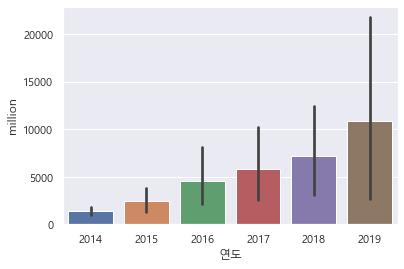

In [70]:
# 위에서 판매유형별 데이터의 "계"만 모은 df_total 변수를 통한 연도별 합계 금액 시각화
# sns.barplot()
sns.barplot(data=df_total, x="연도", y="million")

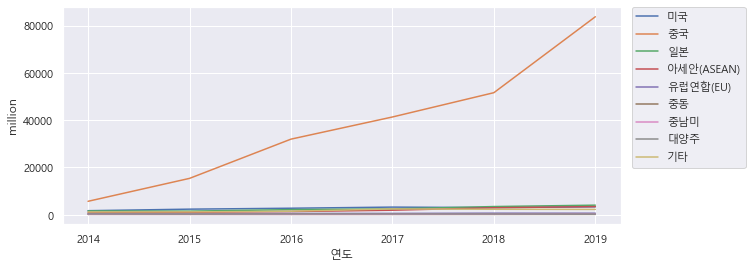

In [74]:
# 연도별 판매액을 그리고 "국가(대륙)별"로 다른 색상으로 표현
# sns.lineplot()
plt.figure(figsize=(10, 4))
sns.lineplot(data=df_total, x="연도", y="million", hue = "국가(대륙)별", ci=None)
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.) # legend 조정

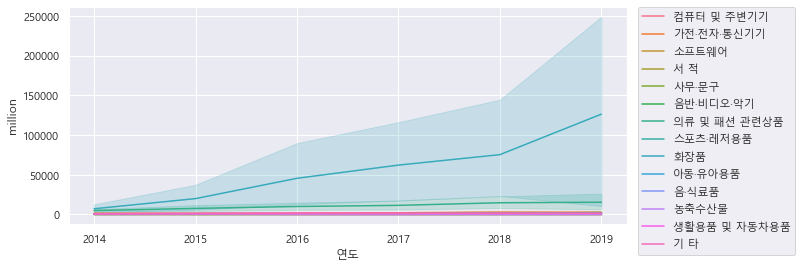

In [76]:
# 연도별 판매액을 그리고 "상품군별"로 다른 색상으로 표현
plt.figure(figsize=(10, 4))
sns.lineplot(data=df_total, x="연도", y="million", hue = "상품군별")
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.) 